In [1]:
%matplotlib widget
import numpy as np
import math
from matplotlib import cm
import pandas as pd
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as matlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('week3.csv')
df.columns = ["X1","X2","y"]
X1=df.iloc[:,0]
X2=df.iloc[:,1]
y=df.iloc[:,2]
X=np.column_stack((X1,X2))

a i)

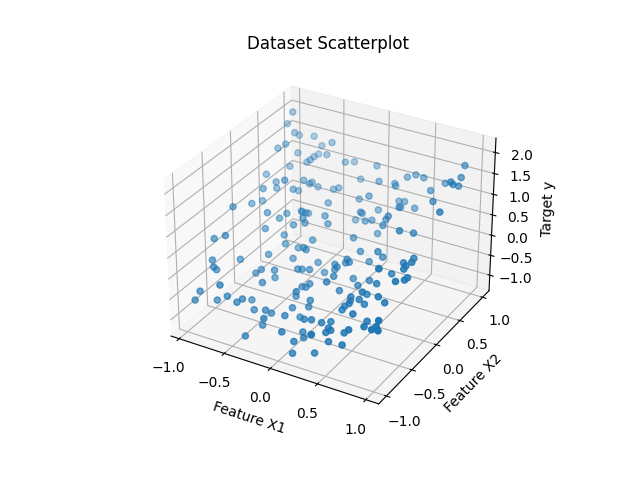

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1,X2,y)
ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Target y')
plt.title('Dataset Scatterplot')
plt.show()

a) ii)

In [3]:
Xpoly = PolynomialFeatures(degree = 5).fit_transform(X)

baseline = DummyRegressor(strategy="mean").fit(Xpoly, y)
print("J(θ_baseline) = %f\n"%mean_squared_error(y, baseline.predict(Xpoly)))

C = [1,10,100,1000,10000]
lassos = []
for Ci in C:
    model = Lasso(alpha=1/(2*Ci)).fit(Xpoly,y)
    lassos.append(model)
    print("\nC value: "+str(Ci))
    print("Lasso coef: "+str(model.coef_))
    print("Lasso intercept: "+str(model.intercept_))
    print("J(θ) = %f\n"%mean_squared_error(y, model.predict(Xpoly)))


J(θ_baseline) = 0.488932


C value: 1
Lasso coef: [ 0. -0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0.
  0. -0.  0.]
Lasso intercept: 0.2704229722505423
J(θ) = 0.488932


C value: 10
Lasso coef: [ 0.         -0.          0.86163092  0.40742646 -0.          0.
 -0.          0.         -0.          0.          0.         -0.
  0.         -0.          0.          0.          0.         -0.
  0.         -0.          0.        ]
Lasso intercept: 0.17520713494363824
J(θ) = 0.071785


C value: 100
Lasso coef: [ 0.00000000e+00 -6.40052388e-04  9.76689923e-01  9.24231453e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00]
Lasso intercept: 0.016495381145412047
J(θ) = 0.037024


C value: 1000
Lasso coef: [ 0.         -0.00197398  1.00333035  0.9957505

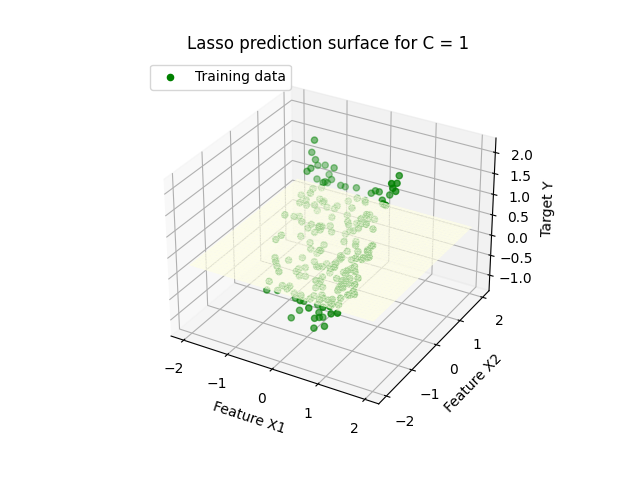

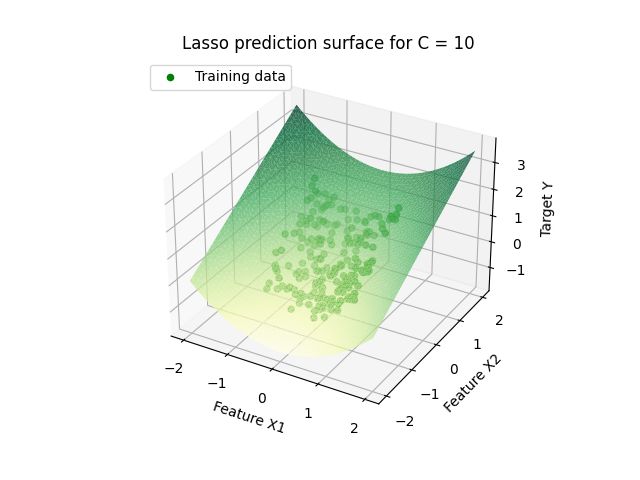

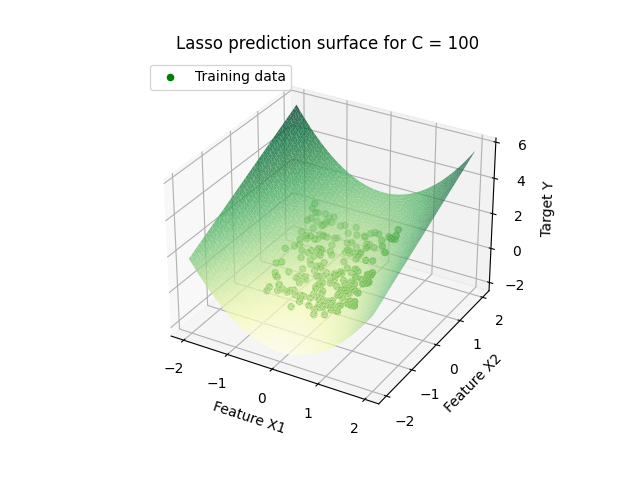

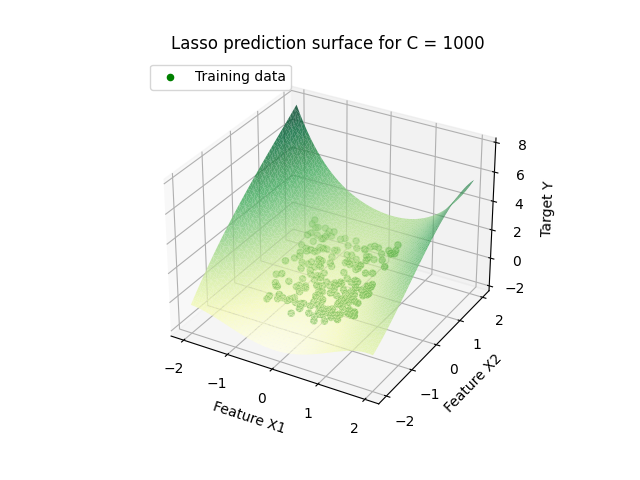

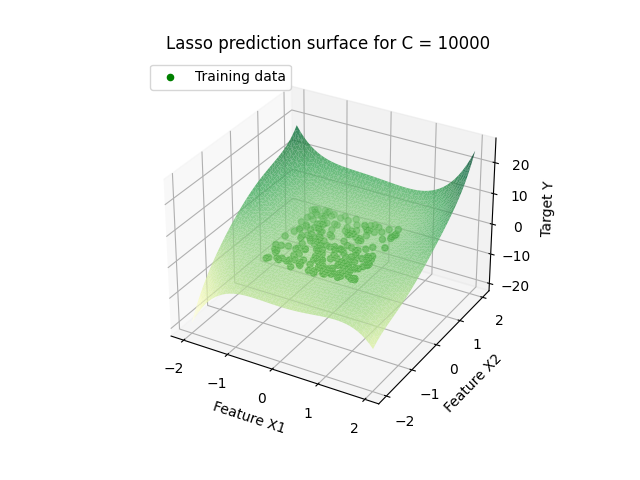

In [4]:
### i) c)
Xtest = []
grid = np.linspace(-2,2)
for i in grid:
    for j in grid:
        Xtest.append([i,j])

Xtest = np.array(Xtest)
Xtest = PolynomialFeatures(5).fit_transform(Xtest)

from matplotlib import cm
Xpoly = PolynomialFeatures(5).fit_transform(X)

C_range = [1, 10, 100, 1000, 10000]
for Ci in C_range:
    model = Lasso(alpha=1/(2*Ci))
    model.fit(Xpoly, y)
    y_pred=model.predict(Xtest)
    
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X1, X2, y, c='g', label="Training data")
    surf = ax.plot_trisurf(Xtest[:,1], Xtest[:,2], y_pred, cmap=cm.YlGn, alpha=0.8, linewidth=0, antialiased=True)
    ax.set_title('Lasso prediction surface for C = %.0f'%Ci)
    ax.set(xlabel='X1', ylabel='X2', zlabel='Target Y')
    ax.legend(loc='upper left') 
    
    plt.xlabel("Feature X1"); plt.ylabel("Feature X2")

    plt.show()


J(θ_baseline) = 0.488932


C value: 0.0001
θ = [ 2.69115054e-01  0.00000000e+00 -1.85136518e-03  1.41944538e-02
  3.52433909e-03 -7.48168688e-04  2.56068708e-04 -7.37203361e-04
  4.63896878e-03 -8.67990665e-04  8.95046404e-03  2.89270446e-03
 -4.92131294e-04  1.42443454e-03 -4.58393066e-04  3.45916432e-04
 -2.86978593e-04  2.78636448e-03 -3.54222463e-04  3.01501289e-03
 -4.75755251e-04  6.59485728e-03]
J(θ) = 0.468832



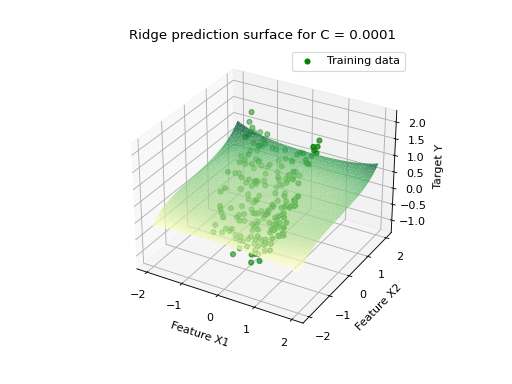


C value: 0.001
θ = [ 0.25737715  0.         -0.01333054  0.11513199  0.03315752 -0.00637964
  0.00204546 -0.00450147  0.03649474 -0.00634923  0.07122832  0.02736099
 -0.00434592  0.01324677 -0.00371345  0.0028011  -0.00098049  0.02167325
 -0.00220102  0.02331334 -0.00339638  0.05189351]
J(θ) = 0.341606



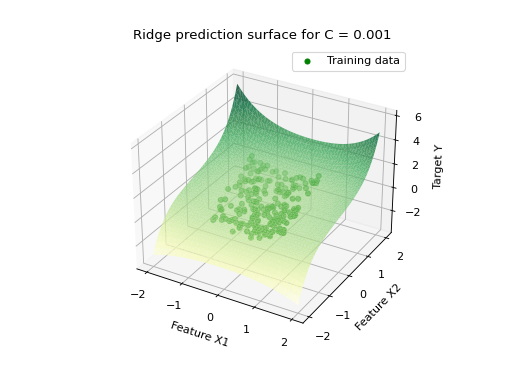


C value: 0.01
θ = [ 1.79549918e-01  0.00000000e+00 -3.40323175e-02  4.26006235e-01
  2.11297114e-01 -2.42874960e-02  8.69751480e-04 -6.11914717e-04
  1.08136079e-01 -1.71000315e-02  2.23619592e-01  1.73772837e-01
 -1.88578176e-02  7.73157141e-02 -9.06530155e-03  5.41880322e-03
  1.25288577e-02  5.93891760e-02 -7.64576386e-05  5.67860996e-02
 -8.49191527e-03  1.45957286e-01]
J(θ) = 0.106170



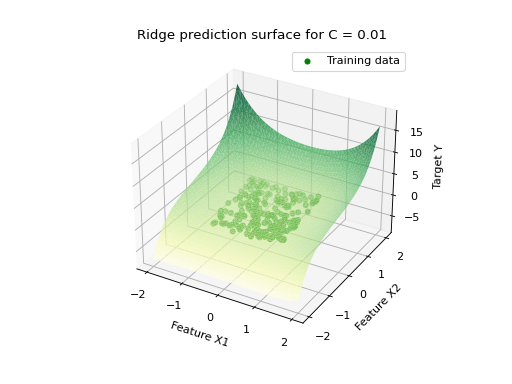


C value: 0.1
θ = [ 0.07583861  0.         -0.02910593  0.75612492  0.50415251 -0.03408404
 -0.03089286 -0.00104755  0.09247862 -0.02027637  0.19137605  0.34671277
 -0.00986244  0.10947379  0.00357075 -0.00164446  0.01292597  0.05492949
  0.01195772 -0.01793444 -0.0119582   0.04113106]
J(θ) = 0.042716



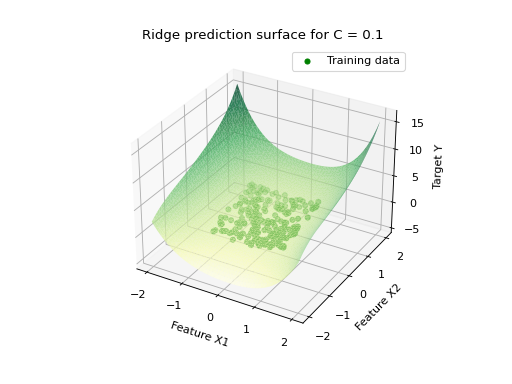


C value: 1
θ = [ 0.02713245  0.          0.00609326  0.96596095  0.8071335  -0.03714312
 -0.06013742 -0.00505175 -0.02981934 -0.06269901  0.02637191  0.20084825
  0.0368316  -0.0401035  -0.03320794  0.06520853 -0.04107793  0.16416912
  0.09998717 -0.08622137 -0.01915017 -0.01297655]
J(θ) = 0.036295



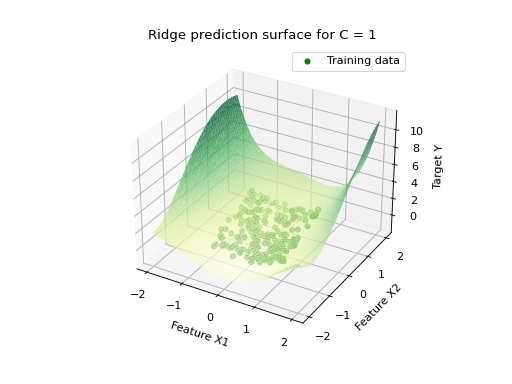


C value: 10
θ = [ 0.00573077  0.          0.03891109  1.08565306  1.01138477 -0.00503603
 -0.08628345 -0.0307071  -0.28270478 -0.18451894 -0.23665783  0.02169679
  0.02425355 -0.12036947 -0.07413567  0.11753733 -0.06051967  0.41490932
  0.24399457 -0.05358815  0.01600938  0.15512826]
J(θ) = 0.035337



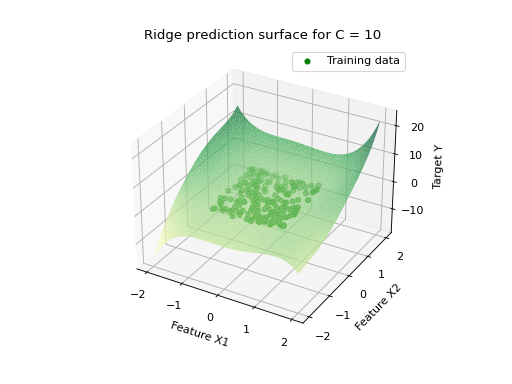

exit


In [5]:
# (i)(e)

baseline = DummyRegressor(strategy="mean").fit(Xpoly, y)
print("J(θ_baseline) = %f\n"%mean_squared_error(y, baseline.predict(Xpoly)))

ridges = []
C_ridge = [0.0001,0.001,0.01,0.1,1,10]
for Ci in C_ridge:
    model = Ridge(alpha=1/(2*Ci)).fit(Xpoly, y)
    theta = np.insert(model.coef_, 0, model.intercept_)
    ridges.append(model)
    
    print("\nC value: "+str(Ci))
    print("θ =", theta)
    print("J(θ) = %f\n"%mean_squared_error(y, model.predict(Xpoly)))
        
    fig = plt.figure(dpi=80)
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:,0], X[:,1], y, c='g', label="Training data")
    surf = ax.plot_trisurf(Xtest[:,1], Xtest[:,2], model.predict(Xtest), cmap=cm.YlGn, alpha=0.8, linewidth=0, antialiased=True)

    ax.set_title('Ridge prediction surface for C = ' + str(Ci))
    ax.set(xlabel='Feature X1', ylabel='Feature X2', zlabel='Target Y')
    ax.legend()

    plt.show()

print("exit")



C: 1
Lasso coeff: [-0.  0.]
Lasso coeff: [-0.  0.]
Lasso coeff: [-0.  0.]
Lasso coeff: [-0.  0.]
Lasso coeff: [-0.  0.]

C: 2
Lasso coeff: [-0.        0.346619]
Lasso coeff: [-0.          0.34987414]
Lasso coeff: [-0.          0.29715698]
Lasso coeff: [-0.          0.29703806]
Lasso coeff: [-0.          0.31599792]

C: 3
Lasso coeff: [-0.          0.56227584]
Lasso coeff: [-0.          0.57719263]
Lasso coeff: [-0.         0.5234503]
Lasso coeff: [-0.          0.53289591]
Lasso coeff: [-0.          0.54894596]

C: 4
Lasso coeff: [-0.          0.67010426]
Lasso coeff: [-0.          0.69085187]
Lasso coeff: [-0.          0.63659696]
Lasso coeff: [-0.          0.65082483]
Lasso coeff: [-0.          0.66541998]

C: 5
Lasso coeff: [-0.          0.73480131]
Lasso coeff: [-0.          0.75904742]
Lasso coeff: [-0.          0.70448496]
Lasso coeff: [0.         0.72158218]
Lasso coeff: [-0.          0.73530439]

C: 6
Lasso coeff: [-0.          0.77793267]
Lasso coeff: [-0.          0.80451112]

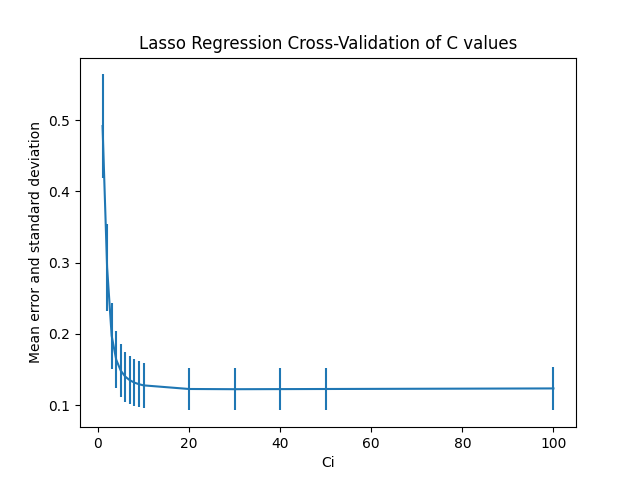


C: 0.0001
Ridge coeff: [-0.00100897  0.0119848 ]
Ridge coeff: [-0.00209206  0.01181179]
Ridge coeff: [-0.00234058  0.0112231 ]
Ridge coeff: [-0.00070229  0.01116124]
Ridge coeff: [-0.00142757  0.0114127 ]

C: 0.001
Ridge coeff: [-0.00810699  0.10802687]
Ridge coeff: [-0.01738761  0.10679069]
Ridge coeff: [-0.02007118  0.1014128 ]
Ridge coeff: [-0.00555516  0.10141924]
Ridge coeff: [-0.01178287  0.10349008]

C: 0.01
Ridge coeff: [-0.01569569  0.54531045]
Ridge coeff: [-0.04884271  0.54898283]
Ridge coeff: [-0.07360981  0.51874023]
Ridge coeff: [-0.00744855  0.53115545]
Ridge coeff: [-0.03064143  0.53783631]

C: 0.015
Ridge coeff: [-0.01120109  0.6419145 ]
Ridge coeff: [-0.0457879  0.6496033]
Ridge coeff: [-0.07818283  0.61275539]
Ridge coeff: [-0.00262352  0.63034415]
Ridge coeff: [-0.02742704  0.63747969]

C: 0.02
Ridge coeff: [-0.0069654   0.70440156]
Ridge coeff: [-0.04154276  0.71542922]
Ridge coeff: [-0.07947235  0.67399969]
Ridge coeff: [0.00166221 0.69533579]
Ridge coeff: [-0.02

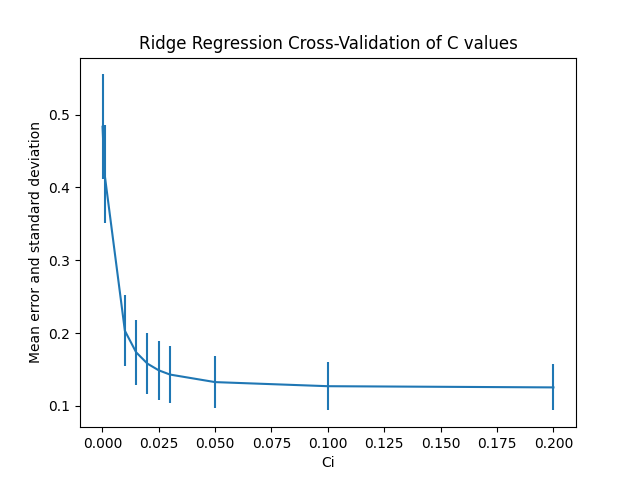

In [6]:
### ii a)

kf = KFold(n_splits=5)
mean_error=[]
std_error=[]
Cs2 = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]
for Ci in Cs2:
    model = Lasso(alpha=1/(2*Ci))
    print("\nC: "+str(Ci))
    kf = KFold(n_splits=5)
    temp = []
    for train, test in kf.split(X):
        model.fit(X[train],y[train])
        ypred = model.predict(X[test])
        print("Lasso coeff: "+str(model.coef_))

        from sklearn.metrics import mean_squared_error
        temp.append(mean_squared_error(y[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())

plt.figure(dpi=100)
plt.errorbar(Cs2,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean error and standard deviation')
plt.title('Lasso Regression Cross-Validation of C values')
plt.show()

### ii c)
mean_error=[]
std_error=[]
C_ridge2 = [0.0001,0.001,0.01,0.015,0.02,0.025,0.03,0.05,0.1,0.2]
for Ci in C_ridge2:
    model = Ridge(alpha=1/(2*Ci))

    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    temp = []
    print("\nC: "+str(Ci))

    for train, test in kf.split(X):
        model.fit(X[train],y[train])
        ypred = model.predict(X[test])
        print("Ridge coeff: "+str(model.coef_))
        from sklearn.metrics import mean_squared_error
        temp.append(mean_squared_error(y[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())

plt.figure(dpi=100)
plt.errorbar(C_ridge2,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean error and standard deviation')
plt.title('Ridge Regression Cross-Validation of C values')
plt.show()
